# K-Nearest Neighbours Classification

## K nearest neighbors

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Algorithm:
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.

## Classification - Personal Loan Dataset

This case is about a bank which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans.

In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

**Dataset Description**:

| Feature | Description |
| --- | --- |
| ID | Customer ID |
| Age | Customer's age in completed years |
| Experience | # years of professional experience |
| Income | Annual income of the customer (In 1,000 dollars) |
| ZIPcode | Home address ZIP code |
| Family | Family size of the customer |
| CCAvg | Average monthly spending on credit cards (In 1,000 dollars) |
| Education | Education level: 1: undergrad; 2: Graduate; 3: Advance/Professional |
| Mortgage | Mortgage Value of house mortgage if any. (In 1,000 dollars) |
| Securities Acct | Does the customer have a securities account with the bank? |
| CD Account | Does the customer have a certifcate of deposit (CD) account with the bank? |
| Online | Does the customer use internet bank facilities? |
| CreditCard | Does the customer use a credit card issued by the UniversalBank? |
| **Personal loan** | **Did this customer accept the personal loan offered in he last campaign? 1: yes; 0: no (target variable)** |

**The classification goal is to predict if the client will subscribe (yes/no) a term loan (variable y).**
___

The dataset is available at the path `datasets` from the current directory.

#### Import all the required packages and classes

In [174]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score
from imblearn.under_sampling import CondensedNearestNeighbour


from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')



!pip install imblearn

#### Read the data

In [175]:
# Read the csv File :: na_values=["?",'#']

univbank = pd.read_csv("/content/UnivBank.csv", na_values=("?", "#"))



In [176]:
print('Universal Bank dataset has ' + str(univbank.shape[0]) + ' rows, and ' + str(univbank.shape[1]) + ' columns')


Universal Bank dataset has 5000 rows, and 14 columns


#### Display the first 5 records

In [177]:
univbank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0,1.0,0.0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0,1.0,0.0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0,0.0,0.0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0,0.0,NaN,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0,0.0,0.0,0,1


#### Display the dimensions, column names and column datatypes

In [178]:
univbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            4998 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  4998 non-null   float64
 11  CD Account          4999 non-null   float64
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 547.0 KB


In [179]:
univbank.shape         # To check dimensions
univbank.dtypes        # To check column datatypes


,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,float64
Personal Loan,int64


#### Check the summary (descriptive statistics)  for all attributes

In [180]:
univbank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,4998.000000,4999.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.521409,0.096000,0.104442,0.060412,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.727873,0.294621,0.305863,0.238273,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check the count of CD Account/ Online/ Credit Card/ Education/ Family/ target attribute

In [181]:
univbank[['CD Account', 'Online', 'CreditCard', 'Education', 'Family', 'Personal Loan']].value_counts()


CD Account  Online  CreditCard  Education  Family  Personal Loan
0.0         1       0           1          1       0                272
                                           2       0                263
            0       0           1          1       0                210
                                           2       0                187
            1       0           2          4       0                184
                                                                   ... 
1.0         0       0           1          3       1                  1
                    1           1          3       0                  1
            1       1           1          1       1                  1
                    0           2          4       0                  1
                                3          2       0                  1
Name: count, Length: 139, dtype: int64

In [182]:
# CD Account

univbank['CD Account'].value_counts()


,count
CD Account,
0.0,4697
1.0,302


In [183]:
# Online
univbank['Online'].value_counts()


,count
Online,
1,2984
0,2016


In [184]:
# Credit Card

univbank['CreditCard'].value_counts()


,count
CreditCard,
0,3530
1,1470


In [185]:
# Education

univbank['Education'].value_counts()


,count
Education,
1,2096
3,1501
2,1403


In [186]:
# Family

univbank["Family"].value_counts()


,count
Family,
1,1472
2,1296
4,1222
3,1010


In [187]:
# Target Attribute

univbank["Personal Loan"].value_counts()

,count
Personal Loan,
0,4520
1,480


In [188]:
# Class Distribution Ratio

univbank["Personal Loan"].value_counts(normalize=True)

,proportion
Personal Loan,
0,0.904
1,0.096


#### Check the number of unique ZIP Codes present in the dataset

In [189]:
print("The number of Unique ZIP Codes in the bank data set is",univbank['ZIP Code'].nunique()
)

The number of Unique ZIP Codes in the bank data set is 467


#### Check the 'ID' present in the dataset

In [190]:
print("The number of Unique ID in the bank data set is",univbank['ID'].head()
)

The number of Unique ID in the bank data set is 0    1
1    2
2    3
3    4
4    5
Name: ID, dtype: int64


#### Remove the unncessary columns (ID and ZipCode)

In [191]:
# Drop ID and Zip Code as they are not useful for prediction
univbank = univbank.drop(['ID', 'ZIP Code'], axis=1)


In [192]:
univbank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0,1.0,0.0,0,0
1,45,19,34,3,1.5,1,0.0,0,1.0,0.0,0,0
2,39,15,11,1,1.0,1,0.0,0,0.0,0.0,0,0
3,35,9,100,1,2.7,2,0.0,0,0.0,NaN,0,0
4,35,8,45,4,1.0,2,0.0,0,0.0,0.0,0,1


In [193]:
univbank.shape

(5000, 12)

#### Convert the attributes to the right data type based on the dataset description

In [194]:
cat_attr = ['Education', 'Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
for cols in cat_attr:
    univbank[cols] = univbank[cols].astype('category')


In [195]:
univbank.dtypes

,0
Age,int64
Experience,int64
Income,int64
Family,category
CCAvg,float64
Education,category
Mortgage,float64
Personal Loan,category
Securities Account,category
CD Account,category


#### Creating dummy variables

If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant.
So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category.


In [196]:

univbank = pd.get_dummies(columns=cat_attr, data=univbank)


In [197]:
univbank.head()

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,...,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1,Personal Loan_0,Personal Loan_1
0,25,1,49,1.6,0.0,True,False,False,False,False,...,False,True,True,False,True,False,True,False,True,False
1,45,19,34,1.5,0.0,True,False,False,False,False,...,False,True,True,False,True,False,True,False,True,False
2,39,15,11,1.0,0.0,True,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
3,35,9,100,2.7,0.0,False,True,False,True,False,...,True,False,False,False,True,False,True,False,True,False
4,35,8,45,1.0,0.0,False,True,False,False,False,...,True,False,True,False,True,False,False,True,True,False


In [198]:
univbank.shape

(5000, 22)

####  Check for missing values

In [199]:
univbank.isna().sum()

,0
Age,0
Experience,0
Income,0
CCAvg,0
Mortgage,2
Education_1,0
Education_2,0
Education_3,0
Family_1,0
Family_2,0


#### Split the data into train and test

In [200]:
y = univbank['Personal Loan_1']
X = univbank.drop(['Personal Loan_0', 'Personal Loan_1'], axis=1)



In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=242324)

In [202]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 20)
(1000, 20)
(4000,)
(1000,)


In [203]:
print(y_train.value_counts())
print(y_test.value_counts())

Personal Loan_1
False    3611
True      389
Name: count, dtype: int64
Personal Loan_1
False    909
True      91
Name: count, dtype: int64


#### Split the attributes into numerical and categorical types

In [204]:
X_train.dtypes

,0
Age,int64
Experience,int64
Income,int64
CCAvg,float64
Mortgage,float64
Education_1,bool
Education_2,bool
Education_3,bool
Family_1,bool
Family_2,bool


In [205]:
for cols in X_train.columns :
    if X_train[cols].dtype == 'uint8':
        X_train[cols]=X_train[cols].astype('int')

In [206]:
for cols in X_test.columns :
    if X_test[cols].dtype == 'uint8':
        X_test[cols]=X_test[cols].astype('int')

In [207]:
X_train.dtypes

,0
Age,int64
Experience,int64
Income,int64
CCAvg,float64
Mortgage,float64
Education_1,bool
Education_2,bool
Education_3,bool
Family_1,bool
Family_2,bool


In [208]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

In [209]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index([], dtype='object')

#### Checking for missing values in train and test dataset

In [210]:
X_train.isnull().sum()

,0
Age,0
Experience,0
Income,0
CCAvg,0
Mortgage,1
Education_1,0
Education_2,0
Education_3,0
Family_1,0
Family_2,0


In [211]:
X_test.isnull().sum()

,0
Age,0
Experience,0
Income,0
CCAvg,0
Mortgage,1
Education_1,0
Education_2,0
Education_3,0
Family_1,0
Family_2,0


#### Imputing missing values with median

In [212]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_test[num_attr] = imputer.transform(X_test[num_attr])


In [213]:
X_train.isnull().sum()

,0
Age,0
Experience,0
Income,0
CCAvg,0
Mortgage,0
Education_1,0
Education_2,0
Education_3,0
Family_1,0
Family_2,0


In [214]:
X_test.isnull().sum()

,0
Age,0
Experience,0
Income,0
CCAvg,0
Mortgage,0
Education_1,0
Education_2,0
Education_3,0
Family_1,0
Family_2,0


#### Imputation for missing values for categoric attributes

In [222]:
cat_attr_clean = [col for col in cat_attr if col in X_train.columns]
print("Valid categorical columns:", cat_attr_clean)

from sklearn.impute import SimpleImputer

# Only proceed if there are valid columns to impute
if cat_attr_clean:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    imputer_cat = imputer_cat.fit(X_train[cat_attr_clean])

    X_train[cat_attr_clean] = imputer_cat.transform(X_train[cat_attr_clean])
    X_test[cat_attr_clean] = imputer_cat.transform(X_test[cat_attr_clean])
else:
    print("No categorical columns found for imputation.")



Valid categorical columns: []
No categorical columns found for imputation.


In [223]:
X_train.head(2)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1
709,29.0,4.0,72.0,2.2,0.0,True,False,False,False,False,False,True,True,False,True,False,False,True,True,False
4078,36.0,12.0,58.0,3.6,0.0,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False


###  Activity on sampling and scaling

#### Standardize the data (numerical attributes only) - Import StandardScaler


In [224]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [225]:
X_train[num_attr]=scaler.transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])

In [226]:
X_train.head(3)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1
709,-1.424575,-1.404255,-0.042082,0.158286,-0.555683,True,False,False,False,False,False,True,True,False,True,False,False,True,True,False
4078,-0.814199,-0.706705,-0.346789,0.963284,-0.555683,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False
1655,-0.901395,-0.793899,-0.455613,0.503285,-0.555683,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False


## Build KNN Classifier Model

In [228]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
model_knn = KNeighborsClassifier()  # n_neighbors=5 by default

# Train the model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Predict on the Test data

In [229]:
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn  = model_knn.predict(X_test)


In [230]:
y_test_pred_knn

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,

In [231]:
y_train_pred_knn

array([False, False, False, ..., False, False, False])

#### FIne the recall classification score

Accuracy on training set: 0.972
Accuracy on testing set: 0.950

In [232]:
print("Accuracy on training set: {:.3f}".format(model_knn.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(model_knn.score(X_test, y_test)))


Accuracy on training set: 0.968
Accuracy on testing set: 0.958


In [233]:
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3611
        True       0.99      0.68      0.81       389

    accuracy                           0.97      4000
   macro avg       0.98      0.84      0.89      4000
weighted avg       0.97      0.97      0.97      4000



In [234]:
print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       909
        True       0.98      0.55      0.70        91

    accuracy                           0.96      1000
   macro avg       0.97      0.77      0.84      1000
weighted avg       0.96      0.96      0.95      1000



#### Building a logistic regression model

In [235]:

from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression()

In [236]:
log_mod.fit(X_train, y_train)

LogisticRegression()

In [237]:
y_train_pred_logistic = log_mod.predict(X_train)
y_test_pred_logistic = log_mod.predict(X_test)


In [238]:
print("Accuracy on training set: {:.3f}".format(log_mod.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(log_mod.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on testing set: 0.965


In [239]:
print(classification_report(y_train, y_train_pred_logistic))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98      3611
        True       0.87      0.67      0.76       389

    accuracy                           0.96      4000
   macro avg       0.92      0.83      0.87      4000
weighted avg       0.96      0.96      0.96      4000



In [240]:
print(classification_report(y_test, y_test_pred_logistic))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       909
        True       0.92      0.67      0.78        91

    accuracy                           0.96      1000
   macro avg       0.95      0.83      0.88      1000
weighted avg       0.96      0.96      0.96      1000



### Finding out the IDEAL K-value for the given dataset

### Method-1

In [241]:
# Creating list of different K values for KNN
kvalues = list(range(1,15))

In [242]:
kvalues

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [243]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross-validation
for k in kvalues:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    print("scores =", scores)
    cv_scores.append(scores.mean())
    print("cv_scores =", cv_scores)


scores = [0.74025974 0.58974359 0.62820513 0.62820513 0.65384615]
cv_scores = [np.float64(0.648051948051948)]
scores = [0.46753247 0.3974359  0.52564103 0.43589744 0.3974359 ]
cv_scores = [np.float64(0.648051948051948), np.float64(0.4447885447885448)]
scores = [0.63636364 0.5        0.61538462 0.58974359 0.53846154]
cv_scores = [np.float64(0.648051948051948), np.float64(0.4447885447885448), np.float64(0.575990675990676)]
scores = [0.53246753 0.41025641 0.51282051 0.41025641 0.41025641]
cv_scores = [np.float64(0.648051948051948), np.float64(0.4447885447885448), np.float64(0.575990675990676), np.float64(0.4552114552114552)]
scores = [0.55844156 0.46153846 0.58974359 0.46153846 0.51282051]
cv_scores = [np.float64(0.648051948051948), np.float64(0.4447885447885448), np.float64(0.575990675990676), np.float64(0.4552114552114552), np.float64(0.5168165168165169)]
scores = [0.53246753 0.38461538 0.5        0.33333333 0.42307692]
cv_scores = [np.float64(0.648051948051948), np.float64(0.4447885447

In [244]:
cv_scores

[np.float64(0.648051948051948),
 np.float64(0.4447885447885448),
 np.float64(0.575990675990676),
 np.float64(0.4552114552114552),
 np.float64(0.5168165168165169),
 np.float64(0.4346986346986347),
 np.float64(0.5014985014985015),
 np.float64(0.42171162171162174),
 np.float64(0.46553446553446554),
 np.float64(0.4141192141192141),
 np.float64(0.4603396603396604),
 np.float64(0.38328338328338324),
 np.float64(0.4346653346653346),
 np.float64(0.372960372960373)]

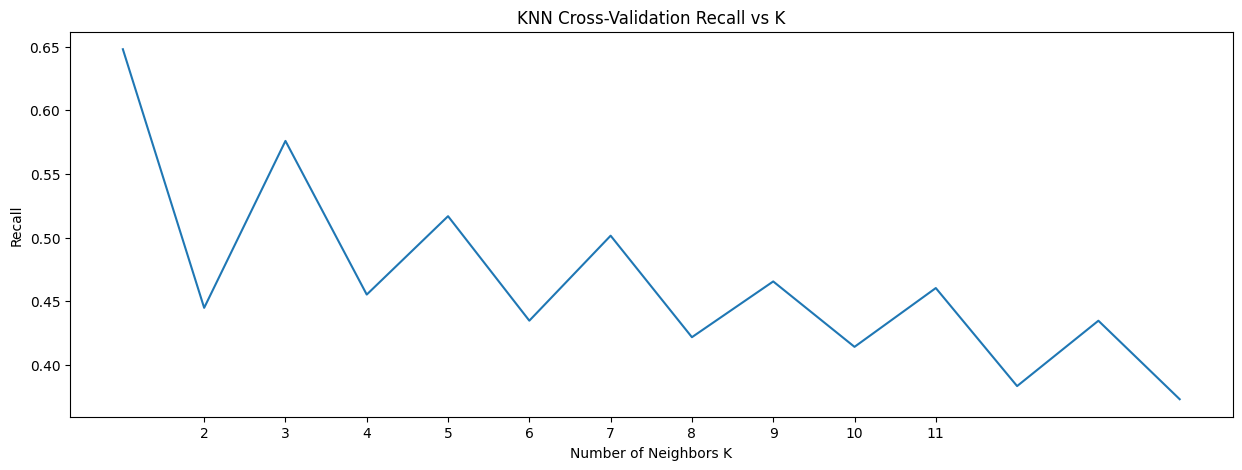

In [245]:


# Plot recall score vs k
plt.figure(figsize=(15,5))
plt.plot(kvalues, cv_scores)

plt.xticks(np.arange(2, 12, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Recall')
plt.title('KNN Cross-Validation Recall vs K')
plt.show()


### Method-2: GridSearch Cross validation

![image.png](attachment:image.png)

### K-fold Cross Validation:

#### 1. Use the GridSearchCV

In [246]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': list(range(2, 12))}

clf = GridSearchCV(KNeighborsClassifier(metric="euclidean"), parameters, cv=5, scoring='recall')

clf.fit(X=X_train, y=y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='recall')

In [247]:

knn_model = clf.best_estimator_
knn_model


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [248]:
print (clf.best_score_, clf.best_params_)

0.575990675990676 {'n_neighbors': 3}


#### 2. Predict on the test data using the best model

In [249]:
y_pred_test=knn_model.predict(X_test)

In [250]:
y_train_pred = knn_model.predict(X_train)
y_test_pred  = knn_model.predict(X_test)

In [251]:
y_pred_test[:5]

array([False, False, False, False, False])

In [252]:
print("Accuracy on training set: {:.3f}".format(knn_model.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(knn_model.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on testing set: 0.964


In [253]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3611
        True       1.00      0.78      0.87       389

    accuracy                           0.98      4000
   macro avg       0.99      0.89      0.93      4000
weighted avg       0.98      0.98      0.98      4000



In [254]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       909
        True       0.98      0.62      0.76        91

    accuracy                           0.96      1000
   macro avg       0.97      0.81      0.87      1000
weighted avg       0.96      0.96      0.96      1000



#### 3. Compute confusion matrix to evaluate the accuracy of the classification

In [255]:
print(confusion_matrix(y_test, y_pred_test))

[[908   1]
 [ 35  56]]


#### 4.  classification score

In [256]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred_test))

0.6153846153846154


## CondensedNearestNeighbour With KNN

In [258]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(n_neighbors=1, random_state=2322)
X_cnn_train, y_cnn_train = cnn.fit_resample(X_train, y_train)
X_cnn_test, y_cnn_test = cnn.fit_resample(X_test, y_test)


In [259]:
X_train.head()


,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1
709,-1.424575,-1.404255,-0.042082,0.158286,-0.555683,True,False,False,False,False,False,True,True,False,True,False,False,True,True,False
4078,-0.814199,-0.706705,-0.346789,0.963284,-0.555683,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False
1655,-0.901395,-0.793899,-0.455613,0.503285,-0.555683,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False
2030,1.540111,1.560331,0.806745,1.135783,1.453151,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True
4610,-0.727002,-0.619511,0.110271,0.963284,0.453586,False,True,False,True,False,False,False,True,False,True,False,False,True,True,False


In [260]:
X_cnn_train.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1.801701,1.909106,-0.455613,-0.474213,-0.555683,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True
1,-1.424575,-1.404255,-0.042082,0.158286,-0.555683,True,False,False,False,False,False,True,True,False,True,False,False,True,True,False
2,-0.814199,-0.706705,-0.346789,0.963284,-0.555683,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False
3,-0.901395,-0.793899,-0.455613,0.503285,-0.555683,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False
4,1.540111,1.560331,0.806745,1.135783,1.453151,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True


In [262]:
X_cnn_train.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1.801701,1.909106,-0.455613,-0.474213,-0.555683,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True
1,-1.424575,-1.404255,-0.042082,0.158286,-0.555683,True,False,False,False,False,False,True,True,False,True,False,False,True,True,False
2,-0.814199,-0.706705,-0.346789,0.963284,-0.555683,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False
3,-0.901395,-0.793899,-0.455613,0.503285,-0.555683,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False
4,1.540111,1.560331,0.806745,1.135783,1.453151,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True


In [263]:
X_test.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1
4443,-0.639805,-0.532318,-0.564437,-0.071714,1.084379,True,False,False,True,False,False,False,True,False,True,False,True,False,True,False
98,0.319358,0.252426,0.436743,-0.934212,-0.555683,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False
4679,-1.686165,-1.753030,1.894984,3.033279,-0.555683,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False
2877,1.104128,1.037169,0.001447,0.215785,-0.555683,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True
3291,0.668144,0.688394,-0.782085,-0.359213,-0.555683,False,True,False,True,False,False,False,True,False,True,False,False,True,True,False


In [261]:
X_cnn_test.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Securities Account_0.0,Securities Account_1.0,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1
0,0.406554,0.426813,-0.912674,-0.704212,-0.555683,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False
1,-0.639805,-0.532318,-0.564437,-0.071714,1.084379,True,False,False,True,False,False,False,True,False,True,False,True,False,True,False
2,0.319358,0.252426,0.436743,-0.934212,-0.555683,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False
3,-1.686165,-1.753030,1.894984,3.033279,-0.555683,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False
4,1.104128,1.037169,0.001447,0.215785,-0.555683,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True


In [264]:
y_cnn_train.shape

(701,)

In [265]:
y_cnn_test.shape

(199,)

### KNN

In [266]:
from sklearn.neighbors import KNeighborsClassifier

cnn_model = KNeighborsClassifier(n_neighbors=3)
cnn_model.fit(X_cnn_train, y_cnn_train)


KNeighborsClassifier(n_neighbors=3)

In [267]:
y_train_pred_cnn = cnn_model.predict(X_cnn_train)
y_test_pred_cnn  = cnn_model.predict(X_cnn_test)


In [268]:
print("Accuracy on training set: {:.3f}".format(cnn_model.score(X_cnn_train, y_cnn_train)))
print("Accuracy on testing set: {:.3f}".format(cnn_model.score(X_cnn_test, y_cnn_test)))

Accuracy on training set: 0.877
Accuracy on testing set: 0.864


In [269]:
print(classification_report(y_cnn_train, y_train_pred_cnn))

              precision    recall  f1-score   support

       False       0.86      0.86      0.86       312
        True       0.89      0.89      0.89       389

    accuracy                           0.88       701
   macro avg       0.88      0.88      0.88       701
weighted avg       0.88      0.88      0.88       701



In [270]:
print(classification_report(y_cnn_test, y_test_pred_cnn))

              precision    recall  f1-score   support

       False       0.87      0.88      0.88       108
        True       0.86      0.85      0.85        91

    accuracy                           0.86       199
   macro avg       0.86      0.86      0.86       199
weighted avg       0.86      0.86      0.86       199



### Reference:

Regressor:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

Classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

GridSearchCV:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html